# Notebook 1 - Working with Vector Data in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functioans to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present different methods on how to visualize data in `GemGIS`.

- [What is GemPy?](#gempy)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Visualization of Model Data](#vis)
- [Plotting Interfaces](#interfaces)
- [Plotting Orientations](#orientations)
- [Plotting Boundaries](#boundaries)
- [Plotting Contours](#contours)
- [Plotting DEM](#digitalelevationmodel)
- [Plotting Hillshades](#hillshades)
- [Plotting Slope](#slope)
- [Plotting Aspect](#aspect)
- [Plotting DEM](#dem)
- [Plotting PyVista](#pyvista)




<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc


<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Sun Oct 04 10:46:09 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

<a id='vis'></a>
# Visualization of Model Data

Data used for the modeling in `GemPy` can either be plotted manually or with methods provided by `GemGIS`. Therefore, we are using a `geo_data` object similar to the `geo_model` object in `GemPy`. Before plotting, the data will be loaded.

## Initiating GemPy Data Class

In [3]:
geo_data = gg.GemPyData()

<a id='interfaces'></a>
# Plotting Interfaces

## Loading data

The interface data will be loaded as a GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [4]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `interfaces` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [5]:
geo_data.raw_i = interfaces
geo_data.raw_i.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [6]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object.

In [7]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas. These were combined in a designated plotting function `gg.visualization.plot_data(...)`.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

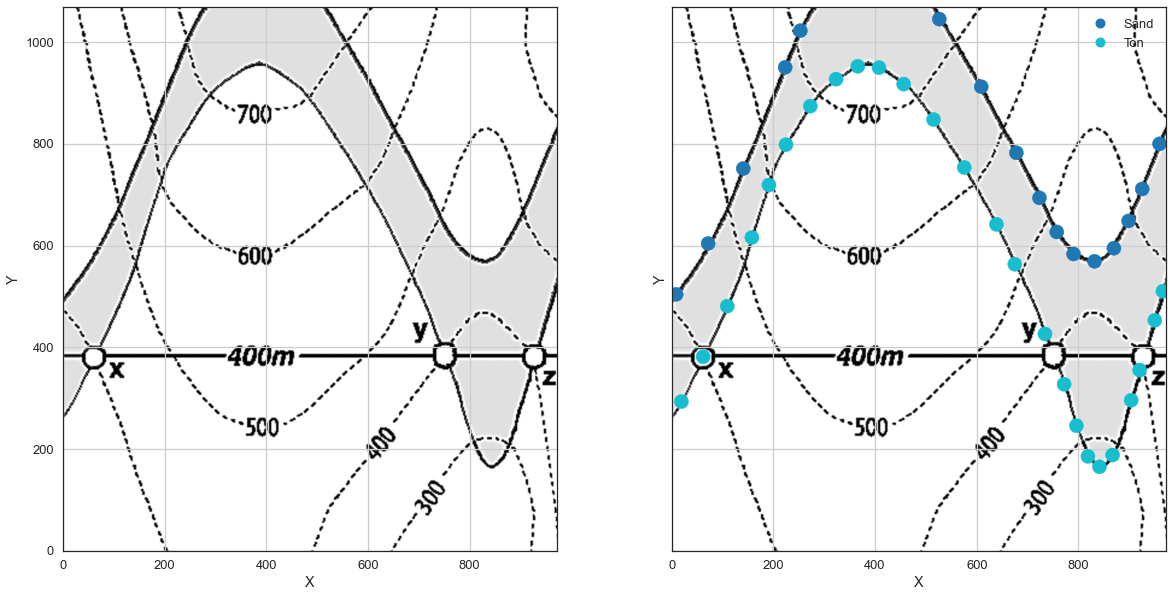

In [8]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True)

<a id='orients'></a>
# Plotting Orientations

## Loading data

The orientation data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [9]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `orientations` are passed to the `geo_data.raw_o` attribute storing the raw orientation data. This attribute is also used for subsequent plotting!

In [10]:
geo_data.raw_o = orientations
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [11]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [12]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

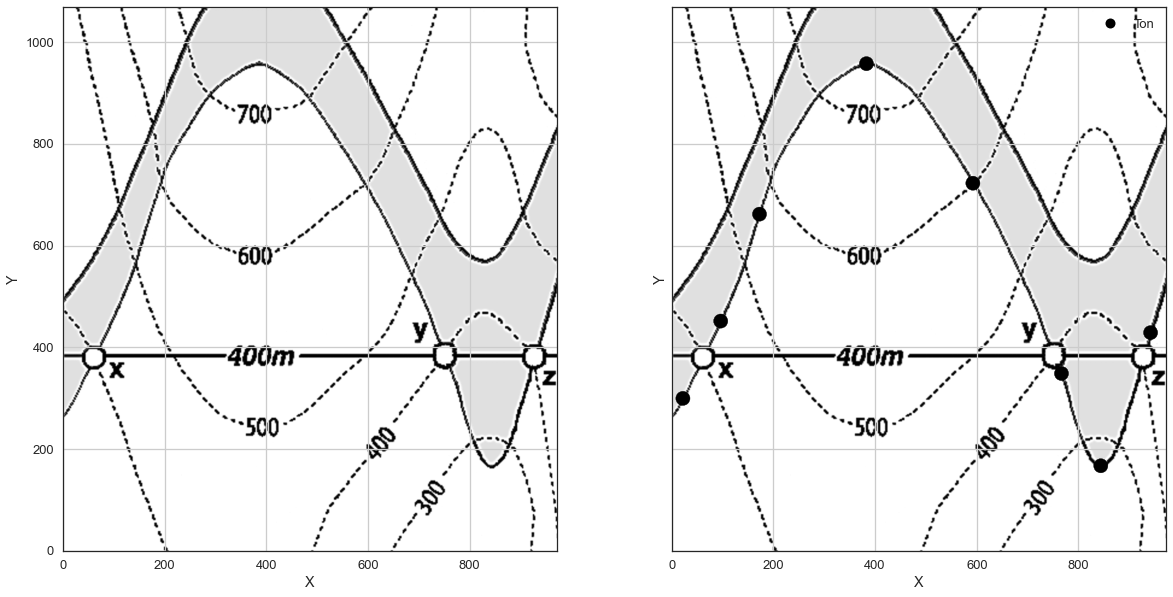

In [13]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_orientations=True)

<a id='boundaries'></a>
# Plotting Boundaries


## Loading data

The boundary data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [14]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [15]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The loaded `boundaries` are passed to the `geo_data.raw_i` attribute storing the raw interface data. This attribute is also used for subsequent plotting!

In [16]:
geo_data.raw_i = boundaries
geo_data.raw_i.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [17]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

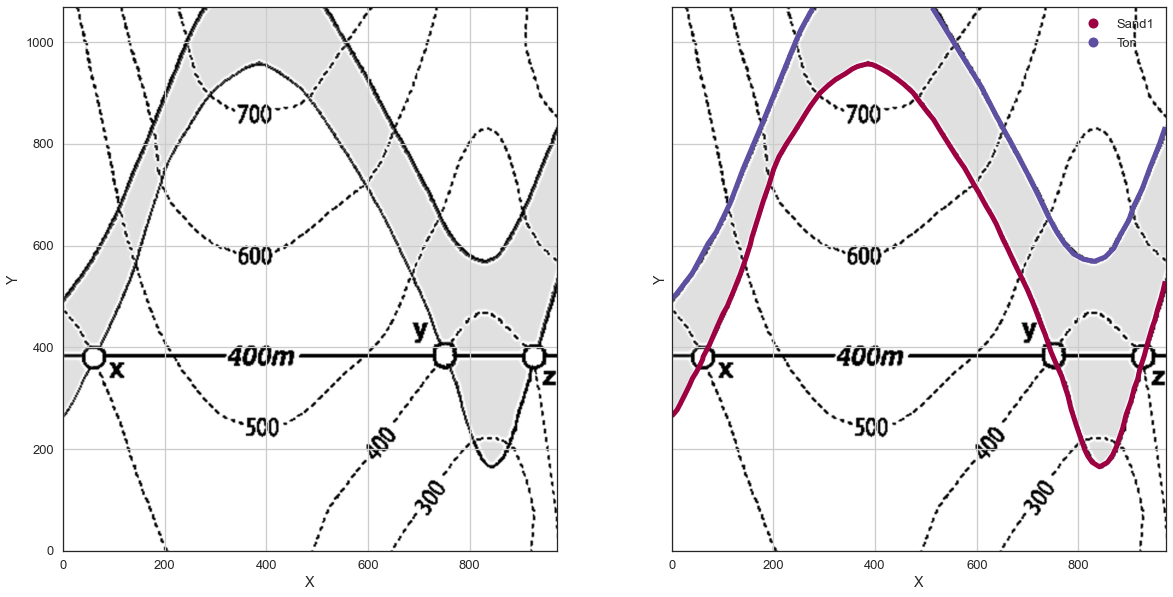

In [18]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_interfaces=True,
                          cmap_interfaces='Spectral')

<a id='contours'></a>
# Plotting Topographic Contours

## Loading data

The height data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [19]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [20]:
geo_data.raw_dem = topo
geo_data.raw_dem

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [21]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [22]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

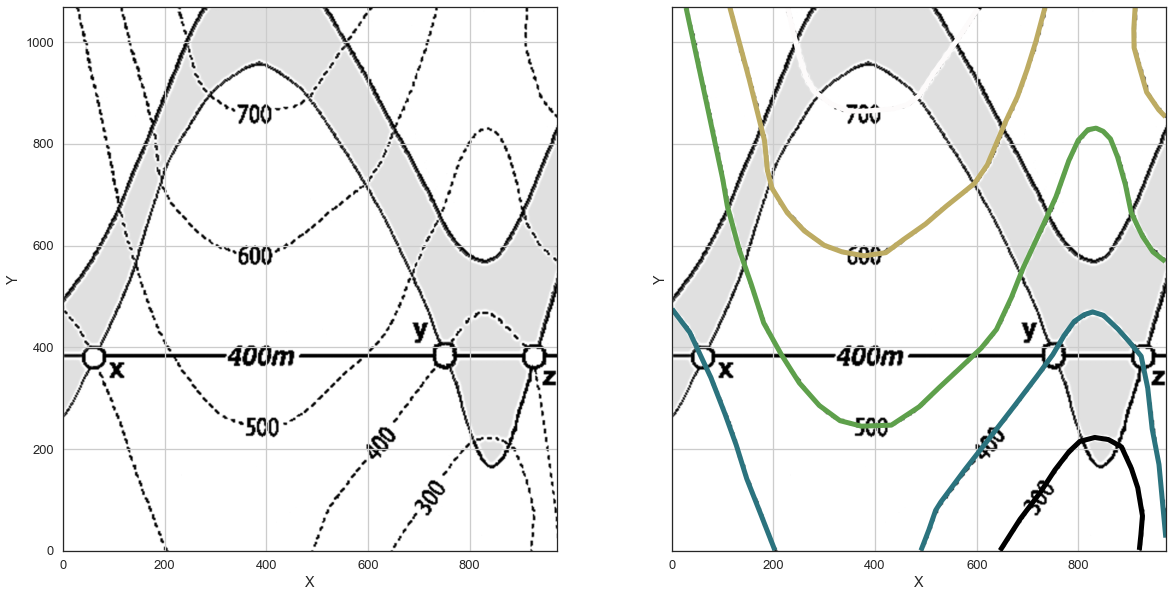

In [23]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_topo=True
                           )

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

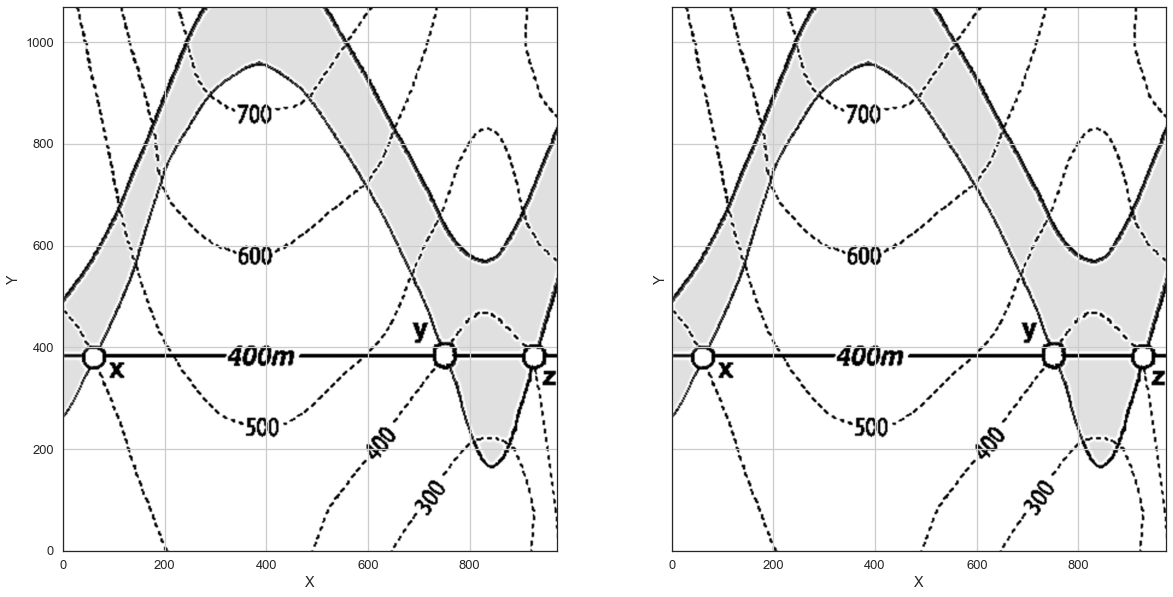

In [24]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap=True, 
                           show_contours=True
                           )

<a id='digitalelevationmodel'></a>
# Plotting DEM
## Loading data

The raster data will be loaded as a rasterio.io.DataSetReader object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). The coordinate reference system (CRS) is stored within the object which is essential to know when transforming data from one CRS to another. 

In [25]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [26]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [27]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [28]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Plotting Data

The raster data can now be plotted next to the geological map without any manipulation by using ```plt.imshow(...)```. Bright values indicate high altitudes, dark colors indicate low altitudes. When plotting the raster it is necessary to provide the extent of the raster as defined above. This way, the raster is scaled to the true extent of the geological map. A second important thing is that the height values of the object can be accessed with ```dem.read(1)``` where 1 is equal to the band number of the raster.

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

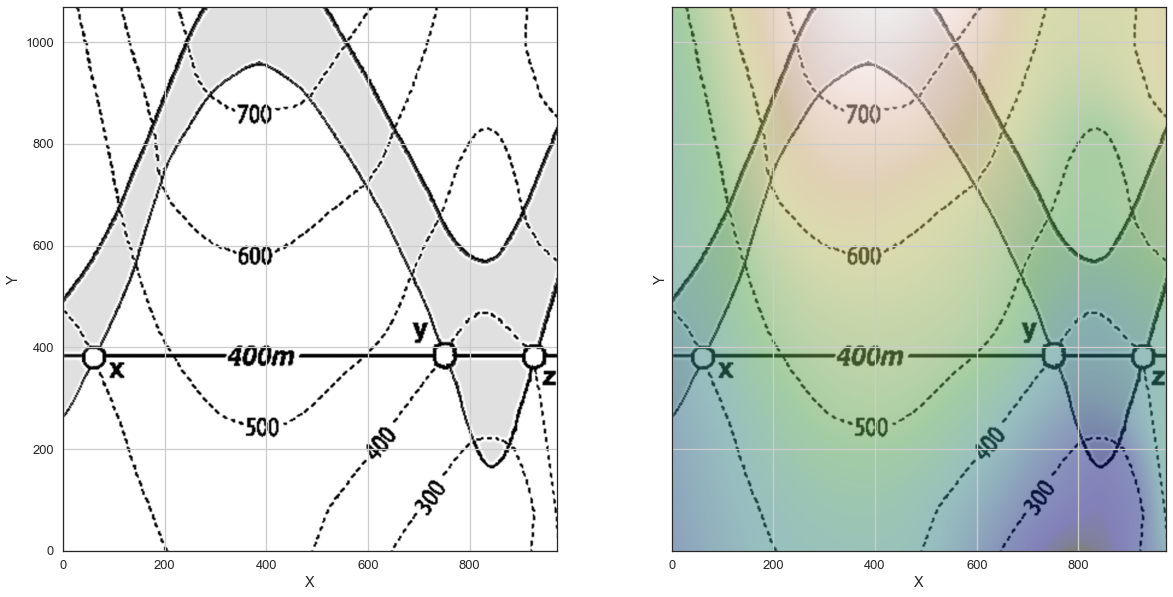

In [29]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True, 
                           hide_topo_left=True)

<a id='hillshades'></a>
# Plotting Hillshades


## Loading Data

In [30]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

The loaded `dem` is passed to the `geo_data.raw_dem` attribute storing the digital elevation data. This attribute is also used for subsequent plotting!

In [31]:
geo_data.raw_dem = dem.read(1)
geo_data.raw_dem

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

The loaded `geological_map` is passed to the `geo_data.geolmap` attribute storing a raster or vector data set (polygons) of the geological map of this area. This attribute is also used for subsequent plotting!

In [32]:
geo_data.geolmap = geological_map.read(1)
geo_data.geolmap

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```. For subsequent plotting, `geo_data.set_extent(...)` is recommended to be used to pass the extent to the `geo_data` object. The extent is chosen based on the dimensions of the provided map (pixels) and its scale. 

In [33]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

## Calculating hillshades

In [34]:
geo_data.hillshades = gg.raster.calculate_hillshades(dem)
geo_data.hillshades

array([[250.04817, 250.21147, 250.38988, ..., 235.01764, 235.0847 ,
        235.0842 ],
       [249.88553, 250.00044, 250.11102, ..., 234.94745, 235.01614,
        235.01909],
       [249.53595, 249.55322, 249.53058, ..., 234.76364, 234.8419 ,
        234.8502 ],
       ...,
       [241.74646, 241.70064, 241.6519 , ..., 242.18367, 243.27975,
        244.16016],
       [241.7718 , 241.72682, 241.67903, ..., 242.60681, 243.4156 ,
        244.1525 ],
       [241.78993, 241.74619, 241.69716, ..., 243.24301, 243.86024,
        244.4877 ]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

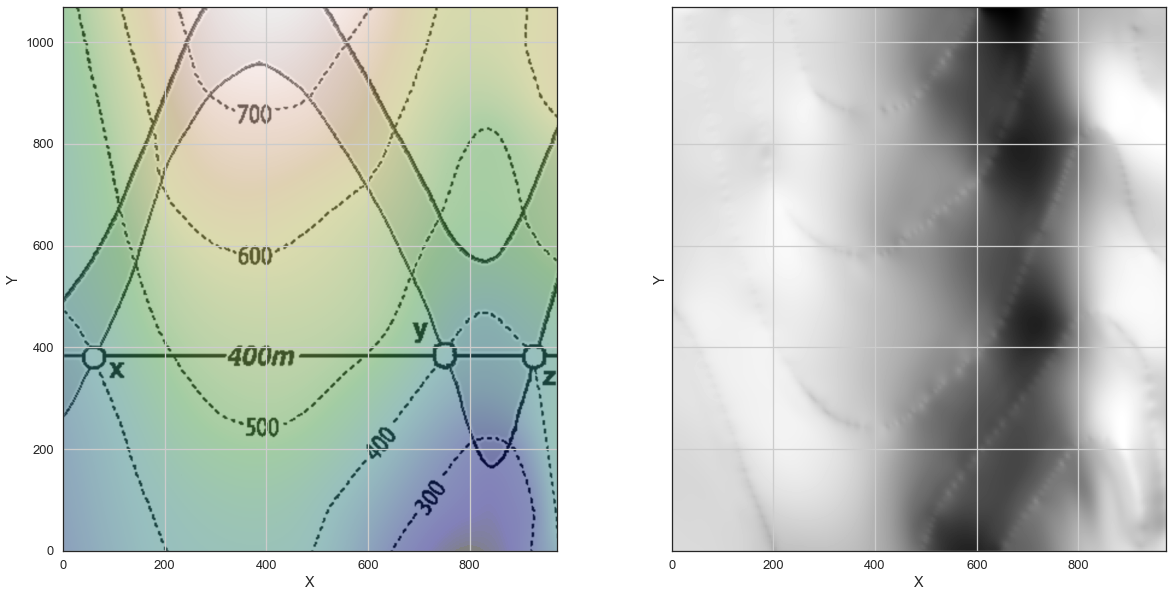

In [35]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_hillshades=True,
                           )

<a id='slope'></a>
# Plotting Slope

## Calcaculating slope

In [36]:
geo_data.slope = gg.raster.calculate_slope(dem)
geo_data.slope

array([[37.092472, 36.95191 , 36.649662, ..., 21.988844, 22.367924,
        22.584248],
       [36.81925 , 36.64412 , 36.29031 , ..., 22.073963, 22.447533,
        22.661581],
       [36.58269 , 36.37289 , 35.983826, ..., 22.148998, 22.519993,
        22.73199 ],
       ...,
       [24.648827, 24.624249, 24.582832, ..., 59.4837  , 60.137577,
        60.524643],
       [24.690985, 24.6643  , 24.620476, ..., 58.058964, 58.838966,
        59.296883],
       [24.728727, 24.70153 , 24.65444 , ..., 56.89897 , 57.80261 ,
        58.33754 ]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

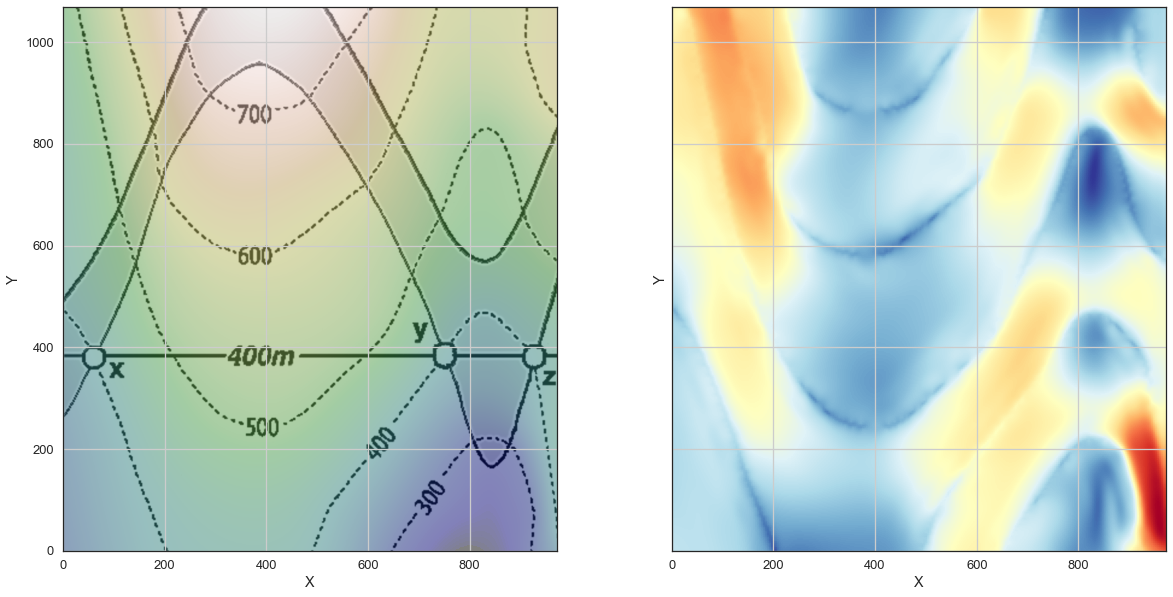

In [37]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_slope=True,
                           )

<a id='aspect'></a>
# Plotting Aspect

## Calculating Aspect

In [38]:
geo_data.aspect = gg.raster.calculate_aspect(dem)
geo_data.aspect

array([[246.37328, 245.80156, 245.04022, ..., 269.87958, 270.11377,
        270.32904],
       [246.66574, 246.21323, 245.62051, ..., 270.13763, 270.35413,
        270.55423],
       [247.50159, 247.31534, 247.10617, ..., 270.65033, 270.82956,
        271.00793],
       ...,
       [255.7753 , 255.86978, 255.94418, ..., 252.48175, 249.94934,
        247.904  ],
       [255.77164, 255.85995, 255.92754, ..., 253.22346, 251.12756,
        249.35535],
       [255.78168, 255.86548, 255.93127, ..., 253.28476, 251.4231 ,
        249.79376]], dtype=float32)

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

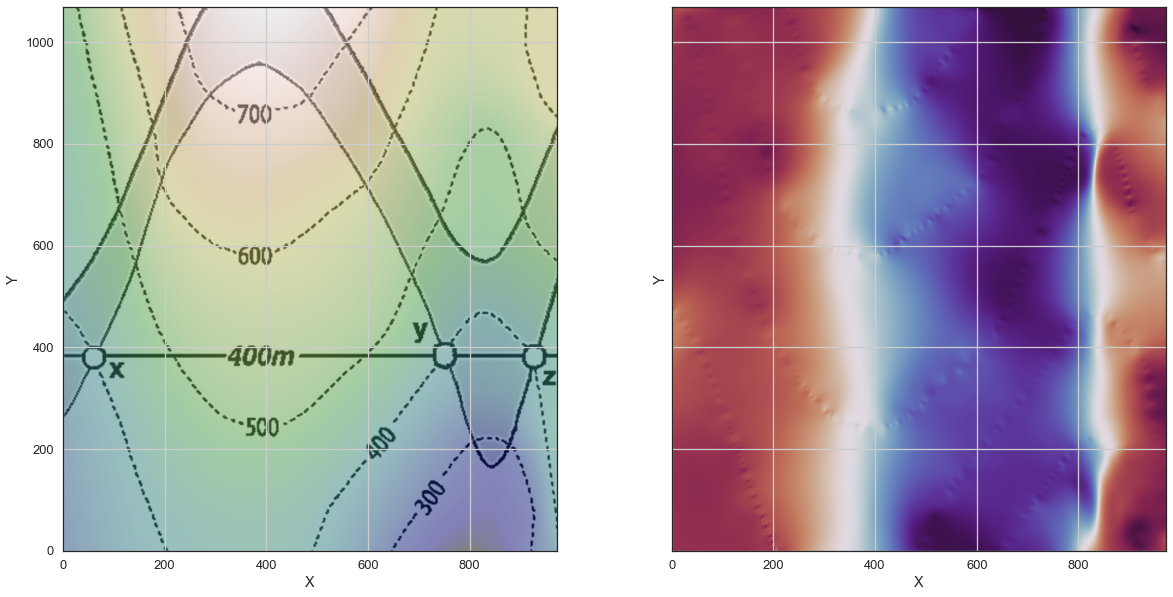

In [39]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           show_aspect=True,
                           )

<a id='dem'></a>
# Plotting the DEM

## Plotting Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

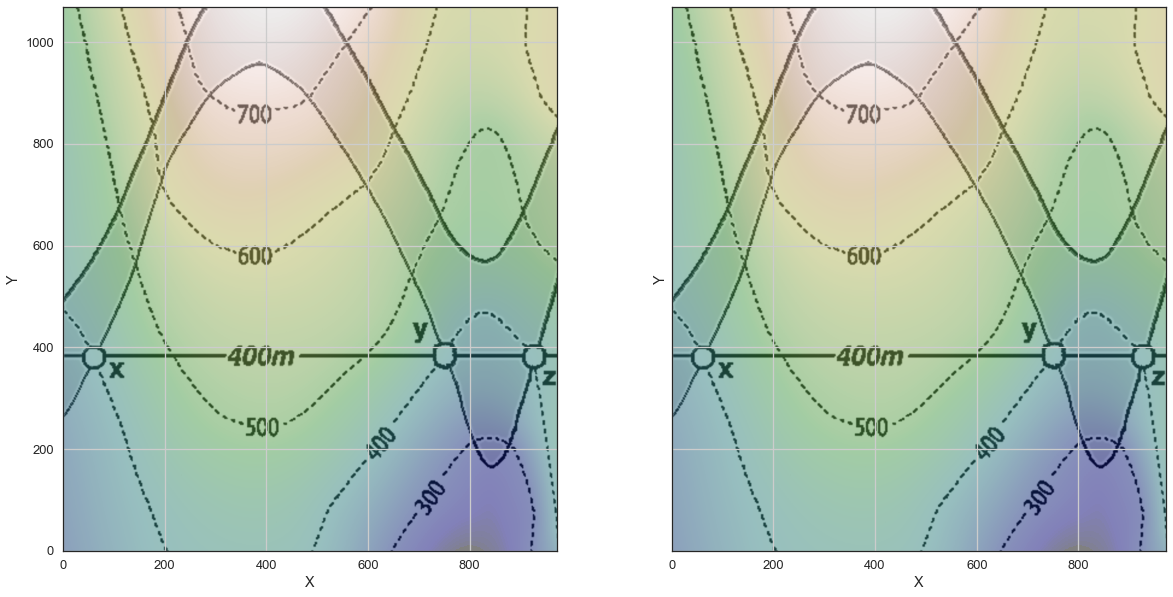

In [40]:
gg.visualization.plot_data(geo_data, 
                           show_geolmap= True, 
                           show_topo=True,
                           )

<a id='pyvista'></a>
# PyVista Visualization
Data cannot only be visualized in 2D but also in 3D with the PyVista Package.

## Create DEM
The DEM must either have the dimensions of the extent or a `res`olution has to be provided for the creation of the structured grid.

In [41]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
dem = gg.vector.interpolate_raster(topo, method='rbf')

## Extracting XYZ Coordinates

XYZ Coordinates are needed to plot the spatial distribution of the input data.

In [42]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
interfaces_coords = gg.vector.extract_coordinates(interfaces, dem, extent = geo_data.extent[:4])
interfaces_coords

,id,formation,geometry,points,X,Y,Z
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86,387.24
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73,387.15
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09,387.38
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31,387.52
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57,388.63
...,...,...,...,...,...,...,...
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ...","(636.0233035161142, 859.787826958076)",636.02,859.79,616.96
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ...","(608.8509591448512, 912.3962634589865)",608.85,912.40,647.22
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ...","(560.1099247138658, 990.6172670215257)",560.11,990.62,696.54
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ...","(526.3753184316984, 1045.3882341089457)",526.38,1045.39,716.81


In [43]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
orientations_coords = gg.vector.extract_coordinates(orientations, dem, extent = geo_data.extent[:4])
orientations_coords

,id,formation,dip,azimuth,geometry,X,Y,Z
0,None,Ton,30.50,180.00,POINT (96.471 451.564),96.47,451.56,441.09
1,None,Ton,30.50,180.00,POINT (172.761 661.877),172.76,661.88,556.87
2,None,Ton,30.50,180.00,POINT (383.074 957.758),383.07,957.76,722.91
3,None,Ton,30.50,180.00,POINT (592.356 722.702),592.36,722.70,601.57
4,None,Ton,30.50,180.00,POINT (766.586 348.469),766.59,348.47,378.01
5,None,Ton,30.50,180.00,POINT (843.907 167.023),843.91,167.02,277.64
6,None,Ton,30.50,180.00,POINT (941.846 428.883),941.85,428.88,425.85
7,None,Ton,30.50,180.00,POINT (22.142 299.553),22.14,299.55,387.83


## Plotting the Data
In order to plot the data, a new `pv.Plotter(...)` needs to be created. Following that, the DEM can be plotted in 3D, the topographic contours can be plotted as well as the contours of the layer boundaries and the point data sets of the extracted interface points and orientations.

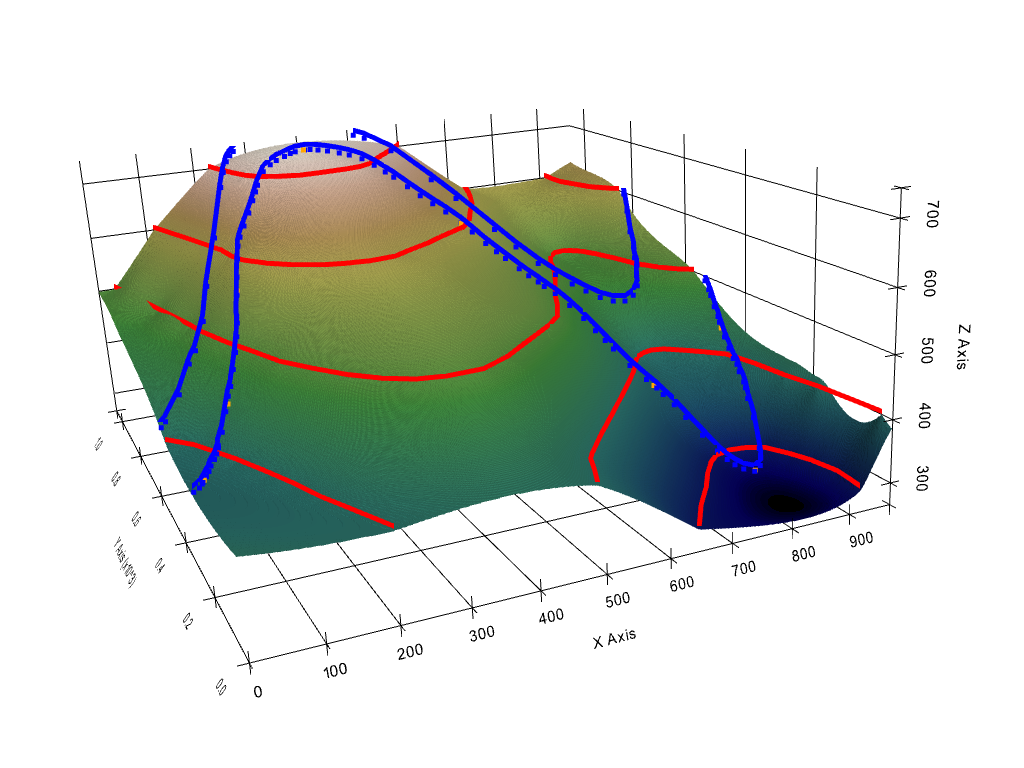

In [44]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(np.flipud(dem), p, cmap = 'gist_earth', extent = geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 5)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 10)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()